<h1>APRENDIZAJE NO SUPERVISADO</h1>

Usando K-Means.
En cada linea estara explicita, en forma de comentario "#", la función de esa fracción de codigo para el desarrollo de la actividad.

In [1]:
#Antes de iniciar instalar
#pip3 install pydotplus
#pip3 install sklearn
#pip3 install pandas
#pip3 install numpy
#pip3 install matplotlib
#pip3 install seaborn

In [2]:
#Librerías necesarias para el algoritmo y graficar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
#Llamar al dataset
#Orden ['Hour', 'Day', 'IsReshare', 'Reach', 'RetweetCount', 'Likes']
dataframe = pd.read_csv(r"../datasets/datosLimpiosns.csv")
dataframe.columns

Index(['Unnamed: 0', 'Hour', 'Day', 'IsReshare', 'Reach', 'RetweetCount',
       'Likes', 'Klout', 'Sentiment'],
      dtype='object')

In [4]:
del dataframe['Unnamed: 0']

In [5]:
dataframe.head()

,Hour,Day,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment
0,17.0,31.0,0.0,44.0,0.0,0.0,35.0,0.0
1,17.0,31.0,1.0,1810.0,5.0,0.0,53.0,2.0
2,17.0,31.0,0.0,282.0,0.0,0.0,47.0,0.0
3,17.0,31.0,0.0,2087.0,4.0,0.0,53.0,0.0
4,17.0,31.0,0.0,953.0,0.0,0.0,47.0,0.0


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Hour          100000 non-null  float64
 1   Day           100000 non-null  float64
 2   IsReshare     100000 non-null  float64
 3   Reach         100000 non-null  float64
 4   RetweetCount  100000 non-null  float64
 5   Likes         100000 non-null  float64
 6   Klout         100000 non-null  float64
 7   Sentiment     100000 non-null  float64
dtypes: float64(8)
memory usage: 6.1 MB


In [7]:
print(dataframe.groupby('Likes').size())

Likes
0.0      99492
1.0         20
2.0          6
3.0          6
4.0          8
         ...  
107.0        1
113.0        1
116.0        1
131.0        1
133.0        1
Length: 87, dtype: int64


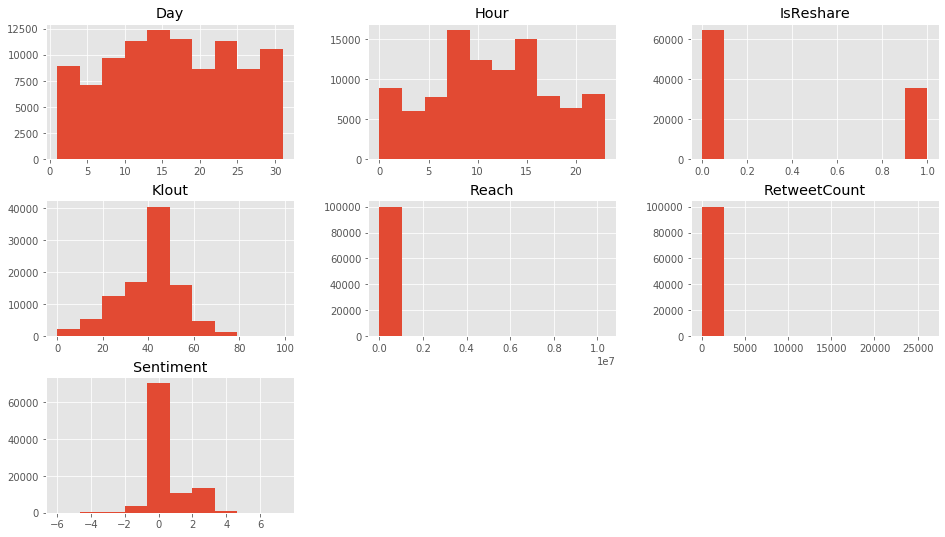

In [8]:
dataframe.drop(['Likes'],1).hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to c

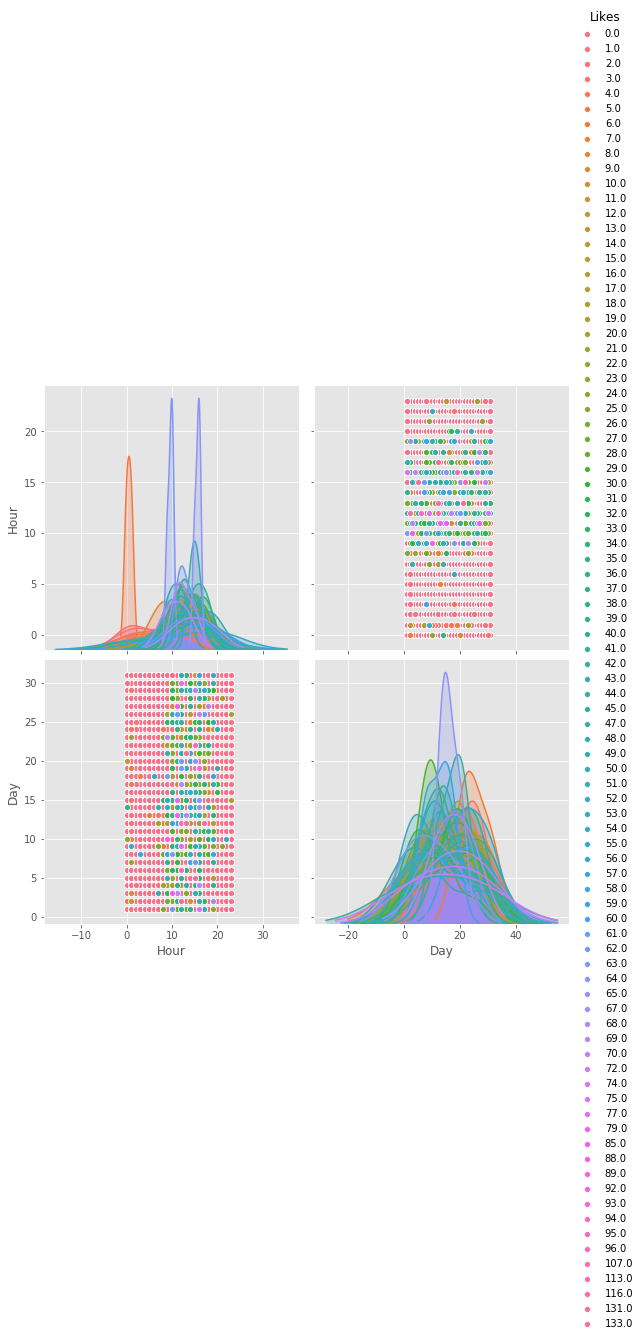

In [9]:
#Combinamos columnas para ver su correlación
sb.pairplot(dataframe.dropna(), hue='Likes',height=4,vars=["Hour", "Day"],kind='scatter')

In [10]:
dataframe = dataframe.astype({"Hour":'int', "Day":'int', "Likes":'int'})


In [11]:
#Definimos los grupos que usaremos
X = np.array(dataframe[["Hour", "Day"]])
y = np.array(dataframe["Likes"])
X.shape

(100000, 2)

In [12]:
#Visualizar en 3D, multiples variables. (En construcción)
#fig = plt.figure()
#ax = Axes3D(fig)
#colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
#asignar=[]
#for row in y:
    #asignar.append(colores[row])
#ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=asignar,s=1000)

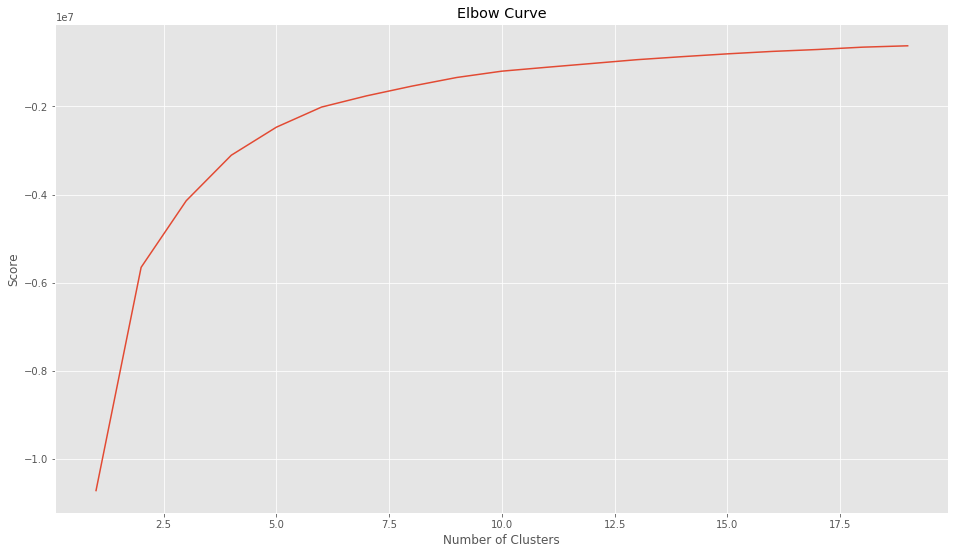

In [13]:
#Obtener el valor K, usando "Punto de Codo"
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [14]:
#Prbaremos K-Means, usando 5 clusters
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[17.00440337 23.54688861]
 [ 7.31184903  5.47692911]
 [17.52149971  9.30832216]
 [ 7.46247246 15.2624005 ]
 [ 6.94083356 25.67605557]]


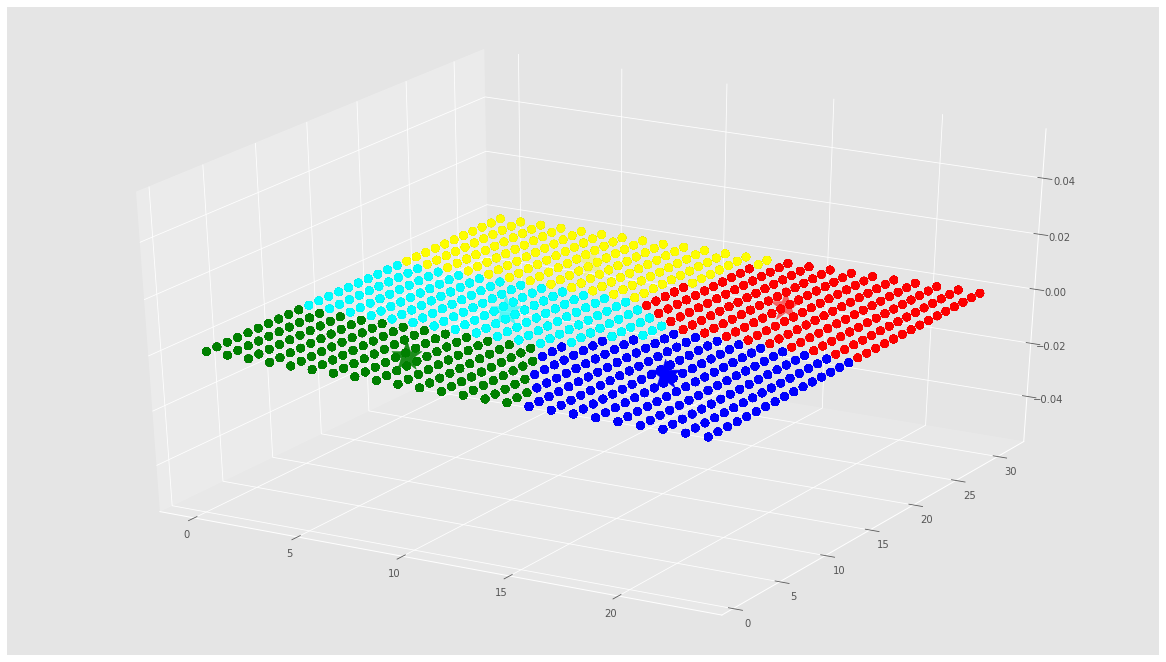

In [15]:
# Modelado, donde podremos visualizar los grupos y su centro con una Figura de estrella
labels = kmeans.predict(X)
# Obtener el centro del clouster
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1],  c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1],  marker='*', c=colores, s=1000)

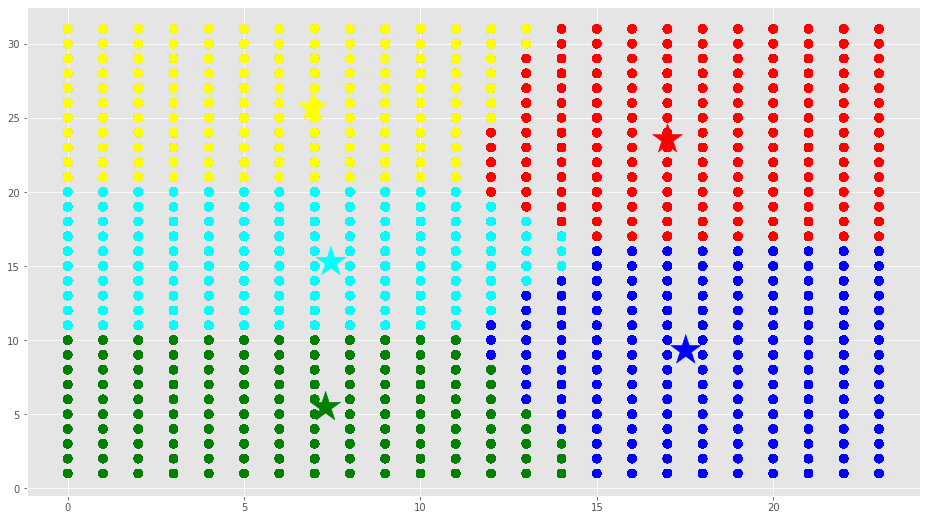

In [16]:
# Para visualizar mejor la grafica anterior, podemos partirla en multiples planos en temrinos(X,Y)
f1 = dataframe['Hour'].values
f2 = dataframe['Day'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

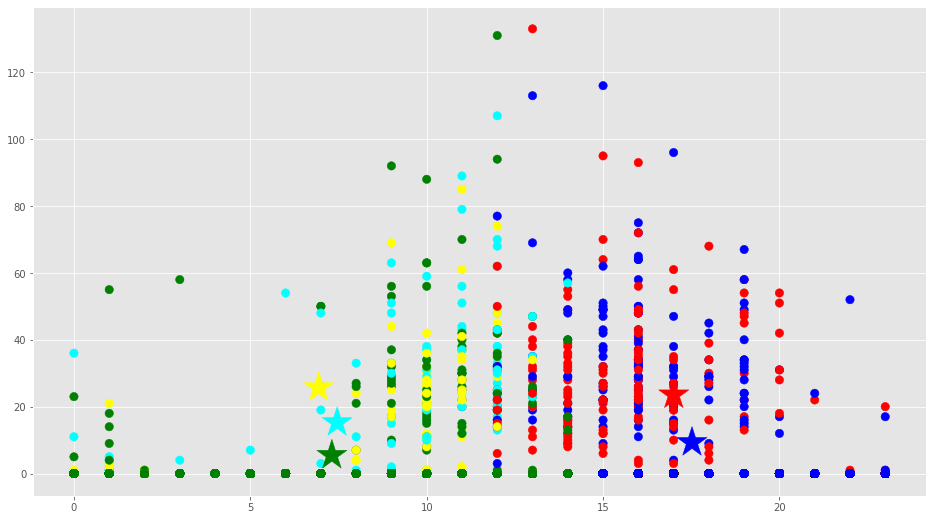

In [17]:
# Para visualizar mejor la grafica anterior, podemos partirla en multiples planos en temrinos(X,Y)
f1 = dataframe['Hour'].values
f2 = dataframe['Likes'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

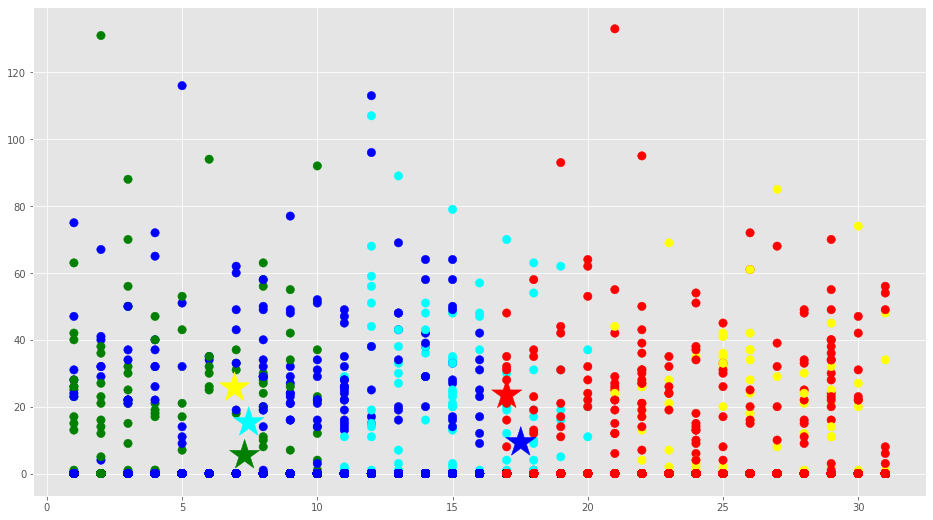

In [18]:
# Para visualizar mejor la grafica anterior, podemos partirla en multiples planos en temrinos(X,Y)
f1 = dataframe['Day'].values
f2 = dataframe['Likes'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [19]:
#Visualizar cuantos registros tiene cada cluster
copy =  pd.DataFrame()
copy['usuario']=dataframe['Hour'].values
copy['target']=dataframe['Likes'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,20666
1,green,17858
2,blue,20884
3,cyan,22237
4,yellow,18355


In [20]:
#No se implemento para esta iteración, ya que no era necesaria.
#group_referrer_index = copy['label'] ==0
#group_referrals = copy[group_referrer_index]
 
#diversidadGrupo =  pd.DataFrame()
#diversidadGrupo['Hour']=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
#diversidadGrupo['cantidad']=group_referrals.groupby('Hour').size()
#diversidadGrupo

In [21]:
#interpretación y validación de la coherencia dentro de clusters de datos
labels = kmeans.labels_
metrics.silhouette_score(dataframe, labels, metric='euclidean')

-0.11485225370396553

In [22]:
#Suma de distancias cuadradas de los clusters a su centro de agrupación más cercano
kmeans.inertia_

2461147.4300011834

In [23]:
#vemos el representante del grupo, sería la posición más cercana a su centroid 
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([21751,  2137,  6438, 12594, 23344])